In [ ]:
!unzip M3_results.zip

Archive:  M3_results.zip
   creating: M3_results/
   creating: M3_results/fact_checker/
  inflating: M3_results/fact_checker/sc_random_random_agent-based_10.txt  
  inflating: M3_results/fact_checker/sc_random_random_agent-based_10_rumor_matrix.txt  
  inflating: M3_results/fact_checker/sc_random_random_agent-based_50.txt  
  inflating: M3_results/fact_checker/sc_random_random_agent-based_50_rumor_matrix.txt  
  inflating: M3_results/fact_checker/sc_random_random_fact_checker_included.txt  
  inflating: M3_results/fact_checker/sc_random_random_fact_checker_included_rumor_matrix.txt  
  inflating: M3_results/fact_checker/sc_random_random_none.txt  
  inflating: M3_results/fact_checker/sc_random_random_none_rumor_matrix.txt  
  inflating: M3_results/fact_checker/sc_random_random_special-based_10.txt  
  inflating: M3_results/fact_checker/sc_random_random_special-based_10_rumor_matrix.txt  
  inflating: M3_results/fact_checker/sc_random_random_special-based_50.txt  
  inflating: M3_result

# Fact Checker

500
451
491
461
491
{'None': [0, 65.0, 0, 19.0], 'Agent-Based-10': [0, 21.78, 0, 1.98], 'Agent-Based-50': [0, 50.5, 0, 10.89], 'Special-Based-10': [0.99, 2.97, 0, 0], 'Special-Based-50': [0, 70.3, 0, 10.89]}


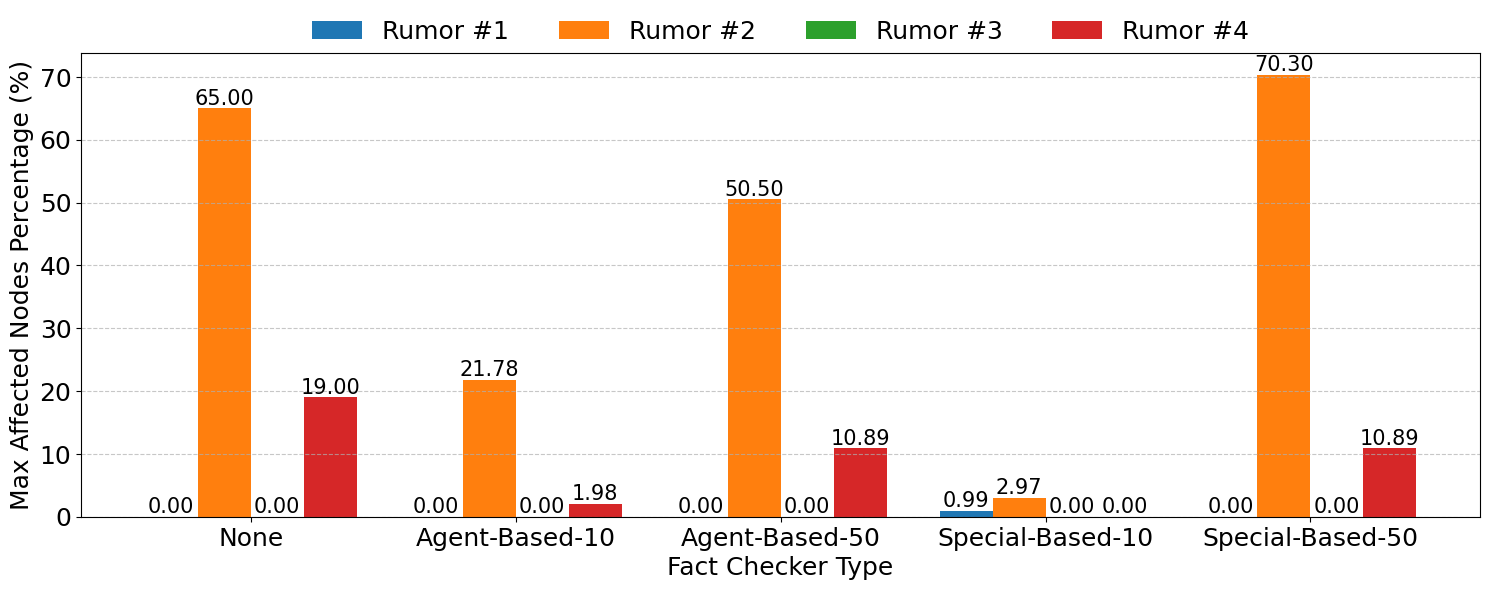

In [ ]:
from re import X
import numpy as np
import matplotlib.pyplot as plt

def read_matrices_from_file(file_path):
  matrices = []  # List to store all matrices

  with open(file_path, 'r') as file:
    content = file.read().strip()  # Read the entire file and remove any trailing newlines or spaces

    # Split the content into blocks based on the double newline separating matrices
    matrix_blocks = content.split('\n\n\n')

    for block in matrix_blocks:
      # Split each block into lines, and then split each line into numbers (integers 0 or 1)
      matrix = []
      for line in block.splitlines():
        # Convert each line to a list of integers
        row = list(map(int, line.split()))  # Parsing 0s and 1s as integers
        matrix.append(row)

      # Convert to a NumPy array (optional, depending on how you want to use the matrices)
      matrix_array = np.array(matrix)
      matrices.append(matrix_array)

  return matrices


def count_rumors(matrix):
  column_sums = np.sum(matrix, axis=0)
  return [round(z,2) for z in 100*column_sums/len(matrix)]


# Collect max spreding for each network
max_spreding = {}

for fact_checker_name, fact_checker in zip(['None', 'Agent-Based-10', 'Agent-Based-50', 'Special-Based-10', 'Special-Based-50'], ['none', 'agent-based_10', 'agent-based_50', 'special-based_10', 'special-based_50']):
  filename = f'M3_results/fact_checker/sc_random_random_{fact_checker}_rumor_matrix.txt'
  matrices_all =read_matrices_from_file(filename)
  print(len(matrices_all))
  max_affected = [0,0,0,0] # initailize with 0 affected
  starting_point = 0
  # ending_point = 450 # Remove that to get full iterations
  # for matrix_i in matrices_all[starting_point:ending_point]:
  for matrix_i in matrices_all[starting_point:]:
    # print(len(matrix_i))
    max_affected = [max(x,y) for x,y in zip(max_affected,count_rumors(matrix_i))]
  max_spreding[fact_checker_name] = max_affected

print(max_spreding)

# Extract keys and values
categories = list(max_spreding.keys())
values = np.array(list(max_spreding.values()))

# Number of clusters and bars per cluster
n_clusters = len(categories)
n_bars = values.shape[1]

# Generate positions for the bars
x = np.arange(n_clusters)
bar_width = 0.2
offsets = np.arange(-(n_bars // 2), (n_bars // 2) + 1) * bar_width

# Create the plot
plt.figure(figsize=(15, 6))
fontsize = 18

for i in range(n_bars):
    bars = plt.bar(x + offsets[i], values[:, i], width=bar_width, label=f'Rumor #{i+1}')
    # Add values on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=fontsize-3
        )

# Add labels, title, and legend
adjusted_ticks = x + offsets[1] + bar_width / 2
plt.xticks(adjusted_ticks, categories, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Fact Checker Type', fontsize=fontsize)
plt.ylabel('Max Affected Nodes Percentage (%)', fontsize=fontsize)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=4, fontsize=fontsize, frameon=False)

# Show the plot
plt.tight_layout()
plt.show()

{'None': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 10.0, 11.0, 12.0, 12.0, 12.0, 13.0, 13.0, 13.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0, 23.0, 24.0, 24.0, 24.0, 24.0, 24.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 26.0, 26.0, 26.0, 26.0,

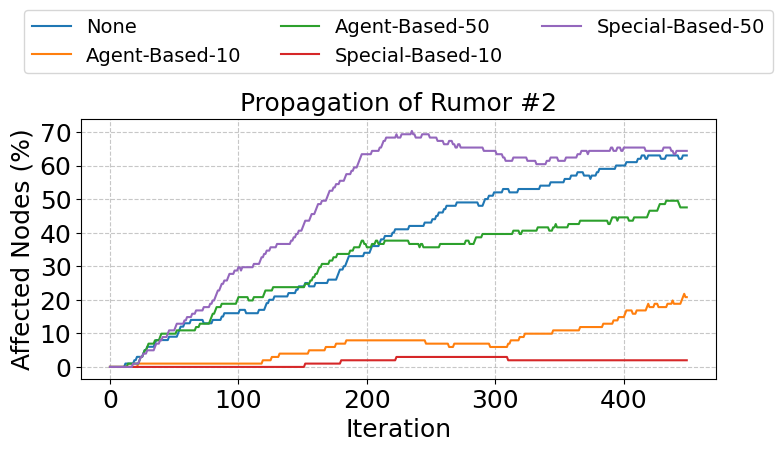

In [ ]:
# Collect max spreding for each network
rumor_slected = 2 # this is Rumor #2
rumor_spreding = {}

for fact_checker_name, fact_checker in zip(['None', 'Agent-Based-10', 'Agent-Based-50', 'Special-Based-10', 'Special-Based-50'], ['none', 'agent-based_10', 'agent-based_50', 'special-based_10', 'special-based_50']):
  rumor_spreding_net = []
  filename = f'M3_results/fact_checker/sc_random_random_{fact_checker}_rumor_matrix.txt'
  matrices_all =read_matrices_from_file(filename)
  starting_point = 0
  ending_point = 450 # Remove that to get full iterations
  for matrix_i in matrices_all[starting_point:ending_point]:
    rumor_spreding_net.append(count_rumors(matrix_i)[rumor_slected-1])
  rumor_spreding[fact_checker_name] = rumor_spreding_net

print(rumor_spreding)
# print(len(rumor_spreding['Erdős–Rényi']))

# Plot each key-value pair as a line
plt.figure(figsize=(8, 5))
fontsize = 18
for key, values in rumor_spreding.items():
    plt.plot(values, label=key)

# Add labels, title, legend, and grid
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Iteration', fontsize=fontsize)
plt.ylabel('Affected Nodes (%)', fontsize=fontsize)
plt.title(f'Propagation of Rumor #{rumor_slected}', fontsize=fontsize)
plt.legend(loc='center', fontsize=fontsize-4, ncol=3, bbox_to_anchor=(0.5, 1.3))
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Filter by post

500
501
500
{'0%': [0, 65.0, 0, 19.0], '25%': [1.0, 30.0, 0, 11.0], '50%': [0, 2.0, 1.0, 1.0]}


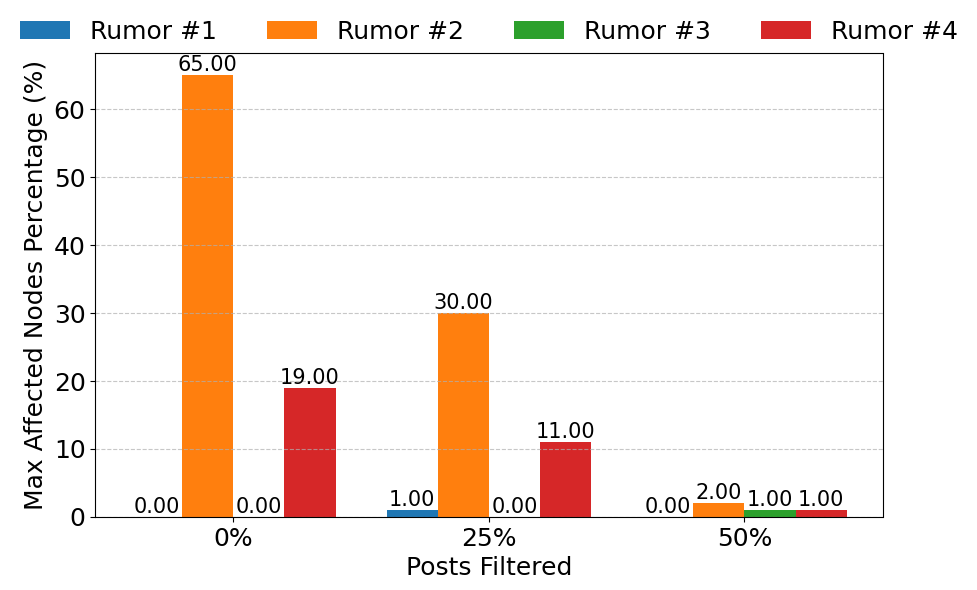

In [ ]:
from re import X
import numpy as np
import matplotlib.pyplot as plt

def read_matrices_from_file(file_path):
  matrices = []  # List to store all matrices

  with open(file_path, 'r') as file:
    content = file.read().strip()  # Read the entire file and remove any trailing newlines or spaces

    # Split the content into blocks based on the double newline separating matrices
    matrix_blocks = content.split('\n\n\n')

    for block in matrix_blocks:
      # Split each block into lines, and then split each line into numbers (integers 0 or 1)
      matrix = []
      for line in block.splitlines():
        # Convert each line to a list of integers
        row = list(map(int, line.split()))  # Parsing 0s and 1s as integers
        matrix.append(row)

      # Convert to a NumPy array (optional, depending on how you want to use the matrices)
      matrix_array = np.array(matrix)
      matrices.append(matrix_array)

  return matrices


def count_rumors(matrix):
  column_sums = np.sum(matrix, axis=0)
  return [round(z,2) for z in 100*column_sums/len(matrix)]


# Collect max spreding for each network
max_spreding = {}

for filter_name, filter_type in zip(['0%', '25%', '50%'], ['none', 'filter_post_0.75', 'filter_post_0.5']):
  filename = f'M3_results/filter_by_post/sc_random_random_{filter_type}_rumor_matrix.txt'
  matrices_all =read_matrices_from_file(filename)
  print(len(matrices_all))
  max_affected = [0,0,0,0] # initailize with 0 affected
  starting_point = 0
  # ending_point = 450 # Remove that to get full iterations
  # for matrix_i in matrices_all[starting_point:ending_point]:
  for matrix_i in matrices_all[starting_point:]:
    # print(len(matrix_i))
    max_affected = [max(x,y) for x,y in zip(max_affected,count_rumors(matrix_i))]
  max_spreding[filter_name] = max_affected

print(max_spreding)

# Extract keys and values
categories = list(max_spreding.keys())
values = np.array(list(max_spreding.values()))

# Number of clusters and bars per cluster
n_clusters = len(categories)
n_bars = values.shape[1]

# Generate positions for the bars
x = np.arange(n_clusters)
bar_width = 0.2
offsets = np.arange(-(n_bars // 2), (n_bars // 2) + 1) * bar_width

# Create the plot
plt.figure(figsize=(10, 6))
fontsize = 18

for i in range(n_bars):
    bars = plt.bar(x + offsets[i], values[:, i], width=bar_width, label=f'Rumor #{i+1}')
    # Add values on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=fontsize-3
        )

# Add labels, title, and legend
adjusted_ticks = x + offsets[1] + bar_width / 2
plt.xticks(adjusted_ticks, categories, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Posts Filtered', fontsize=fontsize)
plt.ylabel('Max Affected Nodes Percentage (%)', fontsize=fontsize)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=4, fontsize=fontsize, frameon=False)

# Show the plot
plt.tight_layout()
plt.show()

# Filter by friend

500
500
500
{'0%': [0, 65.0, 0, 19.0], '25%': [0, 60.0, 0, 22.0], '50%': [4.0, 44.0, 0, 20.0]}


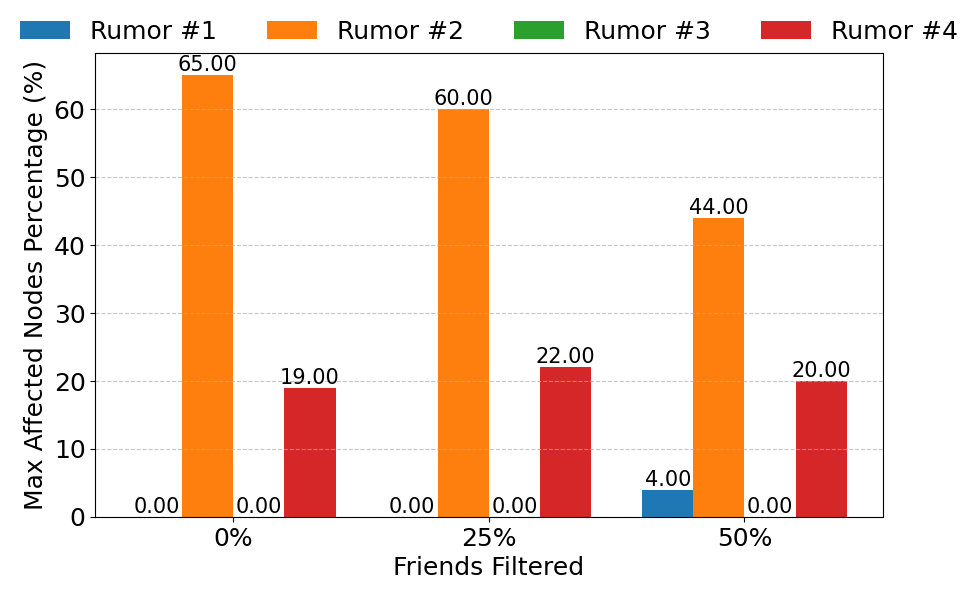

In [ ]:
from re import X
import numpy as np
import matplotlib.pyplot as plt

def read_matrices_from_file(file_path):
  matrices = []  # List to store all matrices

  with open(file_path, 'r') as file:
    content = file.read().strip()  # Read the entire file and remove any trailing newlines or spaces

    # Split the content into blocks based on the double newline separating matrices
    matrix_blocks = content.split('\n\n\n')

    for block in matrix_blocks:
      # Split each block into lines, and then split each line into numbers (integers 0 or 1)
      matrix = []
      for line in block.splitlines():
        # Convert each line to a list of integers
        row = list(map(int, line.split()))  # Parsing 0s and 1s as integers
        matrix.append(row)

      # Convert to a NumPy array (optional, depending on how you want to use the matrices)
      matrix_array = np.array(matrix)
      matrices.append(matrix_array)

  return matrices


def count_rumors(matrix):
  column_sums = np.sum(matrix, axis=0)
  return [round(z,2) for z in 100*column_sums/len(matrix)]


# Collect max spreding for each network
max_spreding = {}

for filter_name, filter_type in zip(['0%', '25%', '50%'], ['none', 'filter_0.75', 'filter_0.5']):
  filename = f'M3_results/filter_by_friend/sc_random_random_{filter_type}_rumor_matrix.txt'
  matrices_all =read_matrices_from_file(filename)
  print(len(matrices_all))
  max_affected = [0,0,0,0] # initailize with 0 affected
  starting_point = 0
  # ending_point = 450 # Remove that to get full iterations
  # for matrix_i in matrices_all[starting_point:ending_point]:
  for matrix_i in matrices_all[starting_point:]:
    # print(len(matrix_i))
    max_affected = [max(x,y) for x,y in zip(max_affected,count_rumors(matrix_i))]
  max_spreding[filter_name] = max_affected

print(max_spreding)

# Extract keys and values
categories = list(max_spreding.keys())
values = np.array(list(max_spreding.values()))

# Number of clusters and bars per cluster
n_clusters = len(categories)
n_bars = values.shape[1]

# Generate positions for the bars
x = np.arange(n_clusters)
bar_width = 0.2
offsets = np.arange(-(n_bars // 2), (n_bars // 2) + 1) * bar_width

# Create the plot
plt.figure(figsize=(10, 6))
fontsize = 18

for i in range(n_bars):
    bars = plt.bar(x + offsets[i], values[:, i], width=bar_width, label=f'Rumor #{i+1}')
    # Add values on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=fontsize-3
        )

# Add labels, title, and legend
adjusted_ticks = x + offsets[1] + bar_width / 2
plt.xticks(adjusted_ticks, categories, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Friends Filtered', fontsize=fontsize)
plt.ylabel('Max Affected Nodes Percentage (%)', fontsize=fontsize)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=4, fontsize=fontsize, frameon=False)

# Show the plot
plt.tight_layout()
plt.show()